# Correlation and Covariance

## Covariance

Covariance measures how much two random variables change together. In other words, it assesses whether larger values of one variable tend to correspond to larger or smaller values of the other variable.

The formula for covariance between two variables $x$ and $y$ is:

$cov(X, Y) = \overline{(x_i - \bar{x})  (y_i - \bar{y})}$

which for a dataset of $n$ points is:

$cov(X, Y) = 1/n * \Sigma [(x_i - \bar{x})  (y_i - \bar{y})]$

Where:

-   $x_i$ and $y_i$ are the individual data points
-   $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$, respectively
-   $n$ is the number of data points

Interpretation:

-   Positive covariance: Indicates that X and Y tend to increase or decrease together.
-   Negative covariance: Indicates that X tends to increase when Y decreases, and vice versa.
-   Zero covariance: Indicates no linear relationship between X and Y.

Let's make up a dummy pair of datasets based on a sinewave with added noise...

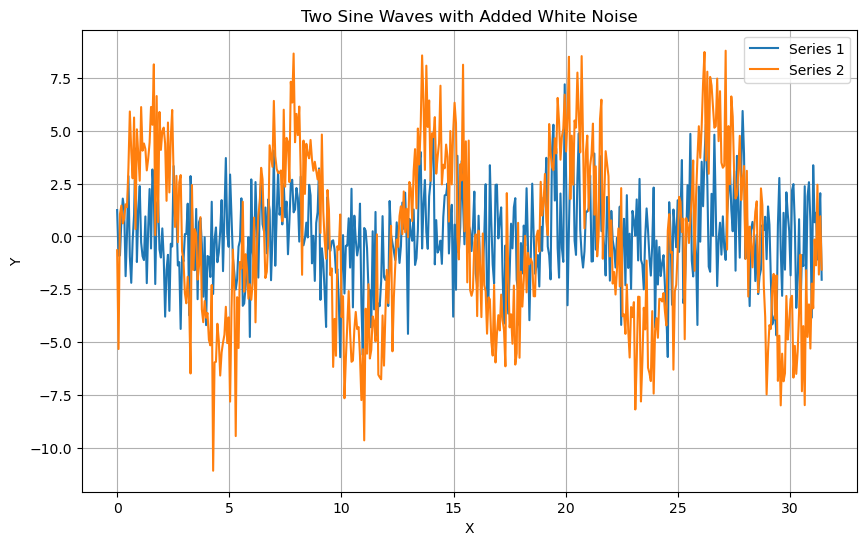

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gen_noisy_sinewaves(num_points=500, mag1=2,mag2=5,noise_magnitude=0.5):
    """
    generates two sine waves with different magnitudes and added white noise.

    Args:
        num_points: The number of data points to generate.
        noise_magnitude: The magnitude of the added white noise.
    """

    # Generate x-values (time)
    x = np.linspace(0, 10 * np.pi, num_points)

    # Generate two sine waves with different magnitudes
    y1 = mag1 * np.sin(x)
    y2 = mag2 * np.sin(x)

    # Add white noise to each sine wave
    noise1 = np.random.normal(0, noise_magnitude, num_points)
    noise2 = np.random.normal(0, noise_magnitude, num_points)
    y1_noisy = y1 + noise1
    y2_noisy = y2 + noise2
    return x,y1_noisy,y2_noisy

def plot_noisy_sinewaves(x,y1,y2):
    """
    Plots two sine waves with different magnitudes and added white noise.

    Args:
        x, y1 and y2
    """
    
    # Create a single subplot (panel)
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # Plot both sine waves on the same panel
    ax.plot(x, y1, label='Series 1')
    ax.plot(x, y2, label='Series 2')

    # Add labels, title, and legend
    ax.set_title('Two Sine Waves with Added White Noise')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True)

    # Show the plot
    plt.show()



# Example usage:
x,y1,y2=gen_noisy_sinewaves(mag1=1,mag2=5,noise_magnitude=2)  # Default parameters
plot_noisy_sinewaves(x,y1,y2)  # Default parameters


<div class="alert alert-block alert-info">

### Discussion  

- Is the covariance positive, negative or close to zero in your opinion ?
- How will increasing or decreasing the noise magnitude change the covariance ?
- What does close to zero actually mean
  
</div>   

Let's code up that relationship for the covariance and find out what it was...

In [2]:
def calculate_covariance_pop(x, y):
    """Calculates covariance between two arrays using only np.mean."""
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length.")

    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.mean((x - mean_x) * (y - mean_y))

    return covariance

In [3]:
# Calculate covariance using the custom function
cov_scratch = calculate_covariance_pop(y1, y2)
print("Covariance (from scratch):", cov_scratch)

# Calculate covariance using np.cov
cov_np = np.cov(y1, y2)[0, 1]  # [0, 1] extracts the covariance value check the help page
print("Covariance (np.cov):", cov_np)



Covariance (from scratch): 2.4817320750453065
Covariance (np.cov): 2.486705486017339


### what has happened?
    
These values are *almost* the same but not quite.  Why is there a difference? 

# Population versus Sample Covariance

The definition of covariance we have is for the case where you have the entire population of data. In this case you would divide the sum by n (the total number of data points) and use the mean. This gives you the population covariance. But often this is not the case and your data is a sample. 

## Sample Covariance:

If you have a sample of data (a subset of the population), you should divide the sum by n - 1.
This gives you the sample covariance, which is an unbiased estimate of the population covariance.   
Dividing by n - 1 corrects for the fact that the sample mean is used to calculate the deviations, which reduces the degrees of freedom.

Why n - 1?  When you calculate the sample mean, you lose one degree of freedom.  Using n - 1 in the denominator corrects for this loss and provides a more accurate estimate of the population covariance.

Thus for a sample covariance the correct definition is 


$cov(X, Y) = 1/(n-1) * \Sigma [(x_i - \bar{x})  (y_i - \bar{y})]$

In [7]:
def calculate_covariance_sample(x, y):
    """Calculates covariance between two arrays using only np.mean."""
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length.")
        
    n=len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x) * (y - mean_y))/(n-1)
    
    return covariance

In [8]:

# Calculate covariance using the custom function for whole population
cov_pop = calculate_covariance_pop(y1, y2)
print("Covariance (from whole population):", cov_pop)

# Calculate covariance using the custom function for sampled population
cov_sam = calculate_covariance_sample(y1, y2)
print("Covariance (from samples):", cov_sam)

# Calculate covariance using np.cov
cov_np = np.cov(y1, y2)[0, 1]  # [0, 1] extracts the covariance value check the help page
print("Covariance (np.cov):", cov_np)


Covariance (from whole population): 2.3166347092529187
Covariance (from samples): 2.3212772637804795
Covariance (np.cov): 2.3212772637804777


As we now see the answer is the same as the numpy package, at least down to rounding error. 

In [ ]:
### Exercise 

Try changing the noise on the calculation how does it change the covariance?


In [27]:
for noise in [0,1,2,3,4,5]:
    x,y1,y2=gen_noisy_sinewaves(mag1=1,mag2=5,noise_magnitude=noise)  # Default parameters
    print("Noise mag:"+str(noise)+", Covariance:", calculate_covariance_sample(y1,y2))


Noise mag:0, Covariance: 2.5
Noise mag:1, Covariance: 2.681043855872002
Noise mag:2, Covariance: 2.6907304622643062
Noise mag:3, Covariance: 2.5963582817846924
Noise mag:4, Covariance: 2.246148202993192
Noise mag:5, Covariance: 3.6546129804665224


### Exercise (cont)

- what do you notice about the covariance as a function of the noise?

- Run it again, and again, and again?  How do the values change?

- What is the impact of changing the sinewave magnitude relative to the noise?  If you make both sinewaves have a magnitude of 5 for example. 

What does the covariance actually mean?  How can we tell if y1 and y2 are more "associated" than y1 and y3 if the underlying magnitude of the oscillations of each changes? For this we need to us

## Correlation

Correlation measures the strength and direction of the **linear** relationship between two variables. It is simply a **normalized** version of covariance, making it easier to compare relationships across different datasets.

The most common type of correlation is the Pearson correlation coefficient, calculated as:

$r = cov(X, Y) / (\sigma(X) \sigma(Y))$


Where:

-   cov(X, Y) is the covariance between $X$ and $Y$
-   $\sigma(X)$ and $\sigma(Y)$ are the standard deviations of $X$ and $Y$, respectively

Interpretation of Pearson Correlation Coefficient ($r$):

-   -1 ≤ $r$ ≤ 1
-   $r$ = 1: Perfect positive linear correlation
-   $r$ = -1: Perfect negative linear correlation
-   $r$ = 0: No linear correlation
-   The closer |r| is to 1, the stronger the linear relationship.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_and_plot(data, title):
    """
    Calculates covariance and correlation, and generates a single scatter plot
    using the subplots structure (even though it's one plot).

    Args:
        data (pd.DataFrame): DataFrame with columns 'X' and 'Y'.
        title (str): Title for the plot.

    Returns:
        None (displays the plot)
    """

    covariance = np.cov(data['X'], data['Y'])[0, 1]
    correlation = np.corrcoef(data['X'], data['Y'])[0, 1]

    print(f"\n--- {title} ---")
    print(f"Covariance: {covariance}")
    print(f"Correlation: {correlation}")

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))  # Create a figure and a single axes object

    ax.scatter(data['X'], data['Y'])
    ax.set_xlabel('X')  # Use ax.set_xlabel
    ax.set_ylabel('Y')  # Use ax.set_ylabel
    ax.set_title(title)  # Use ax.set_title
    ax.grid(True, linestyle='--', alpha=0.6)
    fig.tight_layout()  # Use fig.tight_layout (or plt.tight_layout)
    plt.show()



--- Positive Correlation ---
Covariance: 1.5
Correlation: 0.7745966692414834


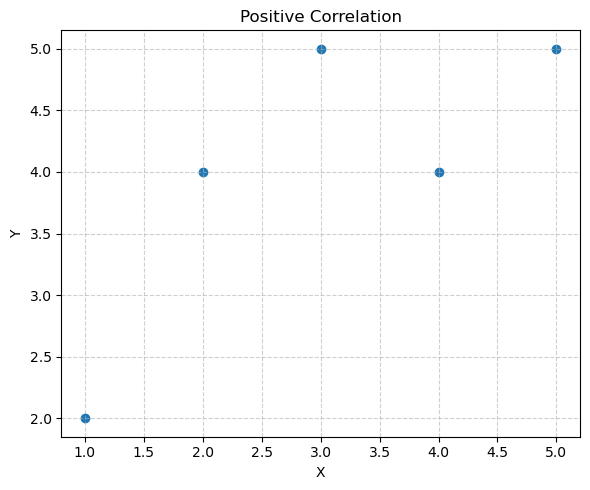

In [7]:
# Example 1: Positive Correlation
data1 = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [2, 4, 5, 4, 5]})
analyze_and_plot(data1, 'Positive Correlation')


--- Negative Correlation ---
Covariance: -2.5
Correlation: -0.9999999999999999


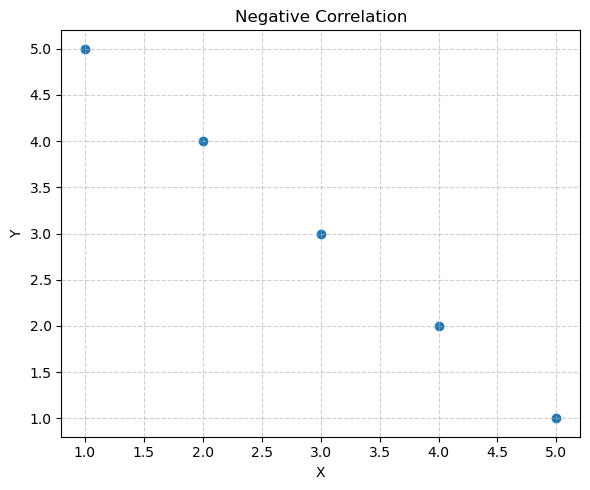

In [9]:
# Example 2: Negative Correlation
data2 = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [5, 4, 3, 2, 1]})
analyze_and_plot(data2, 'Negative Correlation')


--- No Correlation ---
Covariance: 0.0
Correlation: 0.0


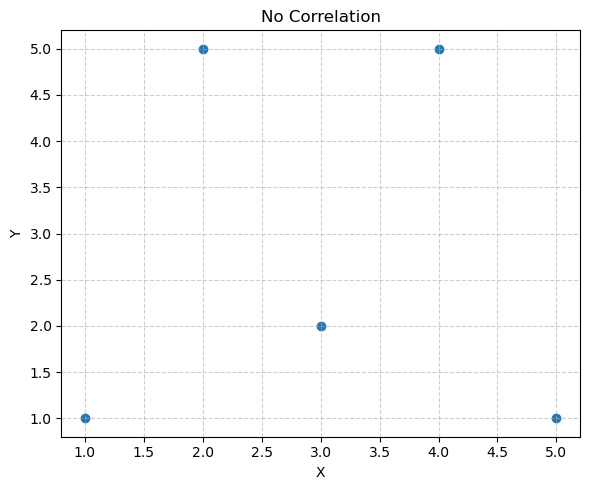

In [10]:
# Example 3: No Correlation
data3 = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [1, 5, 2, 5, 1]})
analyze_and_plot(data3, 'No Correlation')


--- Non-linear relationship ---
Covariance: 0.0
Correlation: 0.0


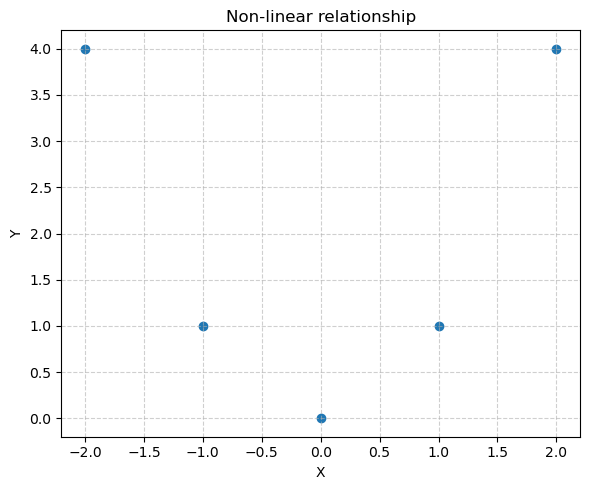

In [11]:
# Example 4: Non-linear relationship
data4 = pd.DataFrame({'X': [-2, -1, 0, 1, 2], 'Y': [4, 1, 0, 1, 4]})
analyze_and_plot(data4, 'Non-linear relationship')


--- Y = X + Gaussian Noise ---
Covariance: 8.99181582777273
Correlation: 0.8363270090606363


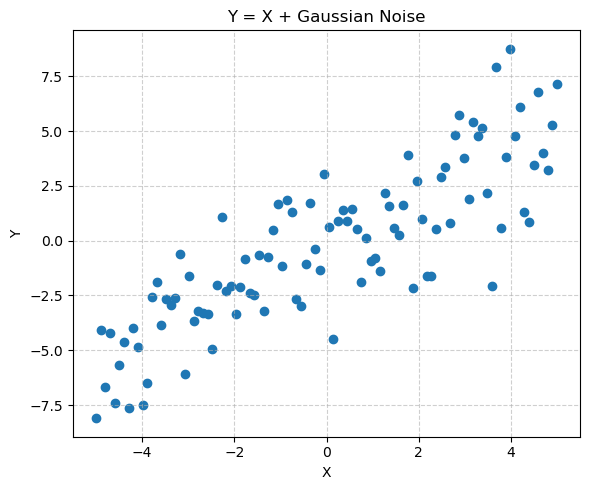

In [27]:
# --- Example Usage (y = x + Gaussian Noise) ---

#np.random.seed(0)  # for reproducibility
x = np.linspace(-5, 5, 100)
noise = np.random.normal(0, 2, 100)  # Mean 0, standard deviation 2
y = x + noise

data = pd.DataFrame({'X': x, 'Y': y})
analyze_and_plot(data, 'Y = X + Gaussian Noise')

## exercise

if you want to apply what you learnt earlier, you can add the regression line to the plot and see how close it is to the 1-1 line

## Statistical Significance of Correlation

While the correlation coefficient (r) measures the strength and direction of a linear relationship, it doesn't tell us if that relationship is statistically significant. Statistical significance indicates whether the observed correlation is likely a true relationship in the population or simply due to random chance in our sample.

**Hypothesis Testing**

To determine statistical significance, we perform hypothesis testing:

1.  **Null Hypothesis (H0):** There is no correlation between the variables in the population ($r = 0$).
2.  **Alternative Hypothesis (H1):** There is a correlation between the variables in the population ($r \ne 0$).

**T-test**

A common way to test the significance of the Pearson correlation coefficient is using a t-test. The t-statistic is calculated as:

$t = r  \sqrt{(n - 2)} / \sqrt{(1 - r^2)}$


Where:

* r is the sample correlation coefficient
* n is the sample size
* The degrees of freedom (df) for the t-distribution are n - 2

**P-value**

The calculated t-statistic is compared to the t-distribution with n - 2 degrees of freedom to obtain a p-value. The p-value represents the probability of observing a correlation as strong as (or stronger than) the one we found in our sample, *assuming that there is no correlation in the population* (i.e., assuming the null hypothesis is true).

**Significance Level (α)**

We set a significance level ($\alpha$), typically 0.05. If the p-value is less than $\alpha$, we reject the null hypothesis and conclude that the correlation is statistically significant.

**Sample Size and Significance**

**The required magnitude of the correlation coefficient (r) to achieve statistical significance decreases as the sample size (n) increases.**

* **Small Sample Sizes:** With small sample sizes, even a moderately strong correlation might not be statistically significant. Random fluctuations have a larger influence, making it harder to distinguish a true relationship from chance. Therefore, you need a larger *r* to be confident it's not a fluke.
  
* **Large Sample Sizes:** With large sample sizes, even a weak correlation can be statistically significant. Large samples provide more statistical power, reducing the impact of random variations.  A smaller *r* can be deemed statistically significant because you have more data to support that the small effect is real.

**Important Implications**

* **Practical vs. Statistical Significance:** A statistically significant correlation doesn't necessarily imply practical importance. A very large sample might yield a significant result for a tiny, practically meaningless correlation. Always consider the context and the magnitude of the effect.
  
* **Overemphasis on P-values:** Avoid solely relying on p-values. Report the correlation coefficient (r) along with confidence intervals to provide a more complete picture of the relationship.

In [17]:
from scipy import stats

def test_correlation_significance():
    """
    Generates two random number series, calculates correlation, 
    and performs a significance test. Returns True if significant, False otherwise.
    """
    # Generate two random number series
    series1 = np.random.rand(10)
    series2 = np.random.rand(10)

    # Calculate the Pearson correlation coefficient using np.corrcoef
    correlation_matrix = np.corrcoef(series1, series2)
    correlation = correlation_matrix[0, 1]

    # Calculate the t-statistic
    n = len(series1)
    t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation**2))

    # Calculate the p-value (two-tailed test)
    degrees_of_freedom = n - 2
    p_value = stats.t.sf(np.abs(t_statistic), df=degrees_of_freedom) * 2

    # Determine significance at the 95% level (alpha = 0.05)
    alpha = 0.05
    
    # Print the results
    print(f"Correlation coefficient: {correlation:.3f}", f"T-statistic: {t_statistic:.3f}")
    
    return p_value < alpha

In [19]:
# Run the test 20 times and count significant results
num_trials = 20
significant_count = 0
for _ in range(num_trials):
    if test_correlation_significance():
        significant_count += 1

# Calculate the proportion of significant results
proportion_significant = significant_count / num_trials

# Print the result
print(f"Out of {num_trials} trials, the correlation was statistically significant in {significant_count} cases.")
print(f"Proportion of significant results: {proportion_significant:.2f}")

Correlation coefficient: -0.378 T-statistic: -1.156
Correlation coefficient: -0.297 T-statistic: -0.880
Correlation coefficient: 0.019 T-statistic: 0.054
Correlation coefficient: -0.534 T-statistic: -1.785
Correlation coefficient: -0.238 T-statistic: -0.693
Correlation coefficient: 0.220 T-statistic: 0.637
Correlation coefficient: 0.225 T-statistic: 0.652
Correlation coefficient: -0.697 T-statistic: -2.747
Correlation coefficient: -0.118 T-statistic: -0.336
Correlation coefficient: -0.510 T-statistic: -1.676
Correlation coefficient: -0.209 T-statistic: -0.604
Correlation coefficient: -0.477 T-statistic: -1.536
Correlation coefficient: 0.471 T-statistic: 1.508
Correlation coefficient: 0.439 T-statistic: 1.382
Correlation coefficient: 0.281 T-statistic: 0.828
Correlation coefficient: 0.191 T-statistic: 0.550
Correlation coefficient: 0.007 T-statistic: 0.019
Correlation coefficient: 0.778 T-statistic: 3.503
Correlation coefficient: 0.166 T-statistic: 0.475
Correlation coefficient: 0.498 T

Notice how many times the correlation comes up as significant? 

You can get a significant result by accident. 



## Note on degrees of freedom

The degrees of freedom is set to n-2 assuming that the observations are INDEPENDENT... One of the most common errors in significance testing is people applying the test to a timeseries with a significant temporal autocorrelation and assuming the degrees of freedom to be n-2. This can overestimate, sometimes drastically, the degrees of freedom, and thus sets the "bar" for significance much lower than it actually should be.  



We can demonstrate this by using a pair of timeseries which are correlated with an amount of noise added to them.  If we take a running mean, we still have the same number of points almost but the degrees of freedom are much less.  

# correlation and causality 

Beware of attributing causality to relationships found. This can be the case but be careful to think about the processes involved. The reason we are stating this is because the next use example will allow us to assess the impact of ENSO on global weather.

# Explained Variance and link to regression

TEXT here.

$r^2$

# exercise 

Get together in groups and look at the definitions of correlation and covariance. If I were to ask you to calculate how much ENSO impacts temperature or rainfall globally, how could you do this with either of these functions? 

Rather than do this in python, we will work through the example using CDO to show you how quickly this can be done.